<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Importing-libraries-and-loading-the-data" data-toc-modified-id="Importing-libraries-and-loading-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libraries and loading the data</a></span></li><li><span><a href="#Choose-a-dependent-variable-for-linear-regression-analysis" data-toc-modified-id="Choose-a-dependent-variable-for-linear-regression-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Choose a dependent variable for linear regression analysis</a></span></li><li><span><a href="#Linear-Regression-Modeling" data-toc-modified-id="Linear-Regression-Modeling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Linear Regression Modeling</a></span><ul class="toc-item"><li><span><a href="#a.-Train/Test-Split" data-toc-modified-id="a.-Train/Test-Split-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>a. Train/Test Split</a></span></li></ul></li></ul></li></ul></div>

## Exploratory Data Analysis

The data I started with contained some features of a number of discrete, constant values that led to several columns being dropped completely. The business problem here is predicting customer purchases by linear regression model. This EDA step is focused on choosing the dependent variable (response variable) and analyzing its relationships with independent predictor variables.

### Importing libraries and loading the data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

from datetime import datetime, date, timedelta
from library.sb_utils import save_file
%matplotlib inline

In [2]:
customer_df = pd.read_csv('customer_data_cleaned.csv')

### Choose a dependent variable for linear regression analysis

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2212 non-null   float64
 1   Wines                2212 non-null   int64  
 2   Fruits               2212 non-null   int64  
 3   Meat                 2212 non-null   int64  
 4   Fish                 2212 non-null   int64  
 5   Sweets               2212 non-null   int64  
 6   Gold                 2212 non-null   int64  
 7   NumDealsPurchases    2212 non-null   int64  
 8   NumWebPurchases      2212 non-null   int64  
 9   NumCatalogPurchases  2212 non-null   int64  
 10  NumStorePurchases    2212 non-null   int64  
 11  NumWebVisitsMonth    2212 non-null   int64  
 12  Year                 2212 non-null   int64  
 13  Age                  2212 non-null   int64  
 14  Edu                  2212 non-null   object 
 15  Household            2212 non-null   o

In [4]:
#those numeric discrete values represent categories;
#and the prediction of category-placement is most often best done by classification algorithms;
#In regression analysis, the continous variables are sensible choices for dependent variables.
customer_df.drop(columns=['Year','Edu', 'Household'], inplace=True)

In [5]:
customer_df.columns

Index(['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Days_Enrolled',
       'Total_Spent', 'Age_group', 'Children', 'Total_AcceptedCmp'],
      dtype='object')

In [6]:
cols= ['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Children', 'Total_AcceptedCmp']

In [7]:
df = customer_df.loc[:, cols]
df.head()

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Total_AcceptedCmp
0,58138.0,635,88,546,172,88,88,3,8,10,4,7,65,0,0
1,46344.0,11,1,6,2,1,6,2,1,1,2,5,68,2,0
2,71613.0,426,49,127,111,21,42,1,8,2,10,4,57,0,0
3,26646.0,11,4,20,10,3,5,2,2,0,4,6,38,1,0
4,58293.0,173,43,118,46,27,15,5,5,3,6,5,41,1,0


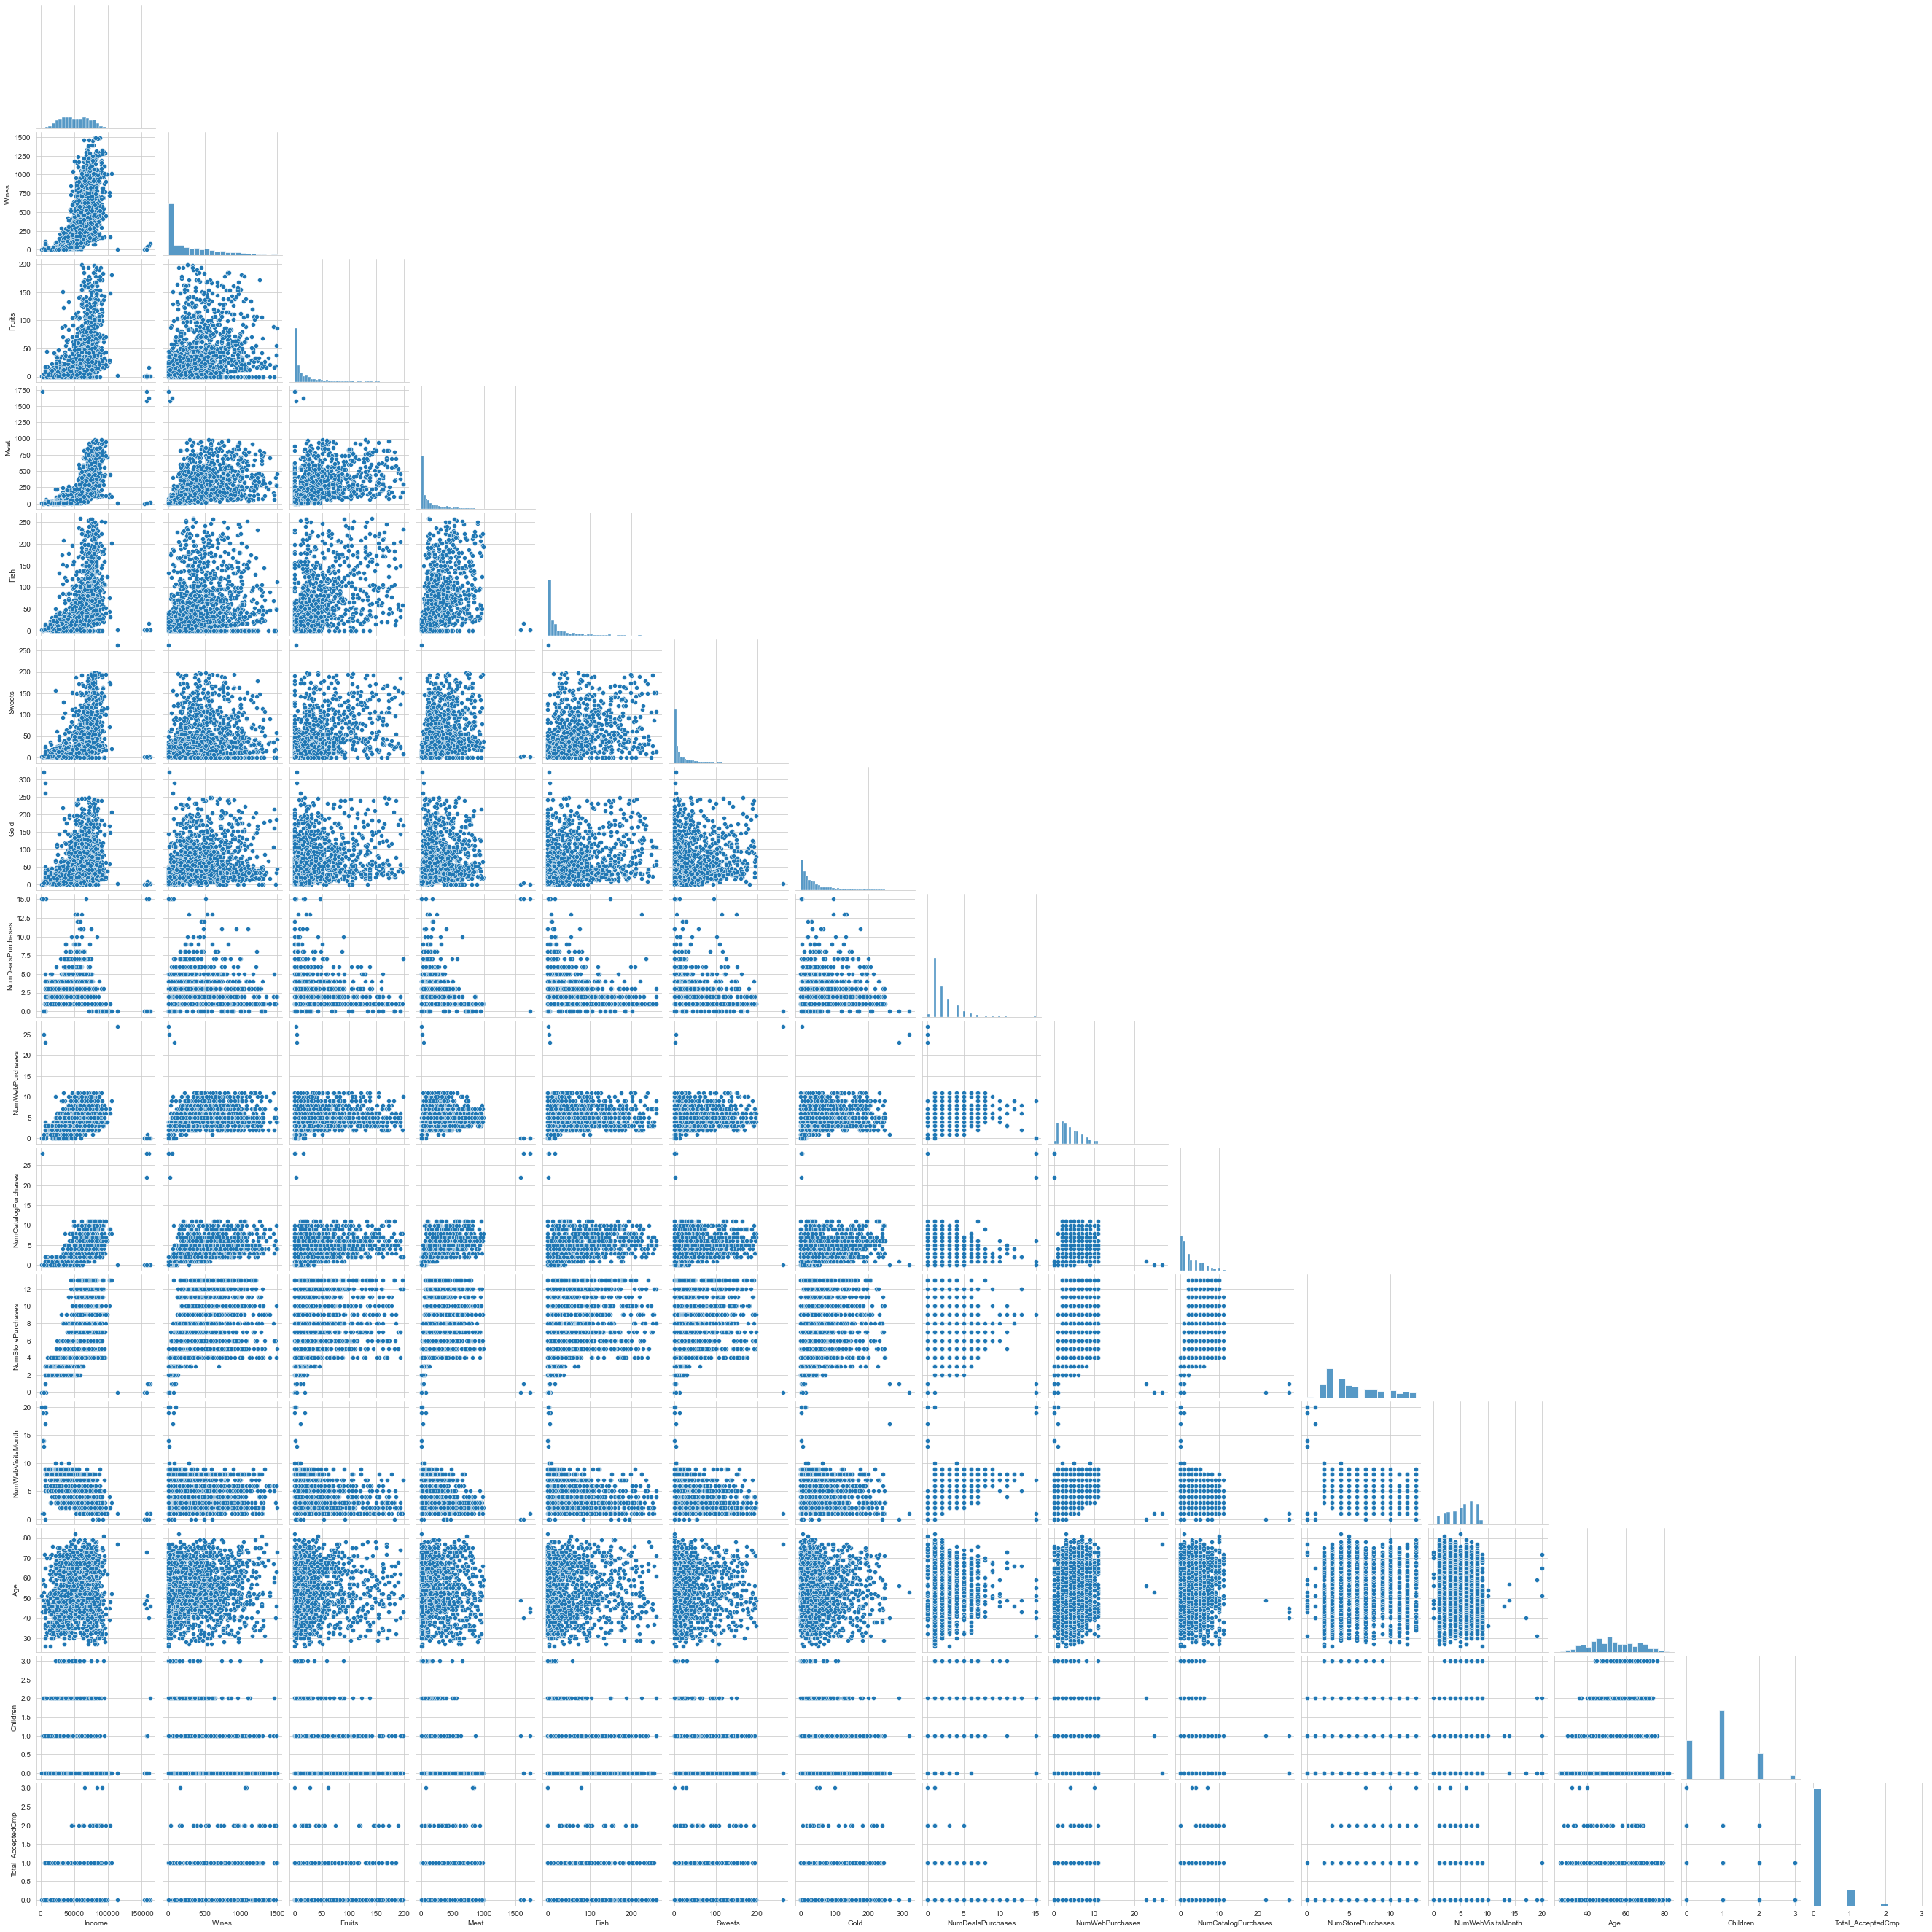

In [8]:
# seaborn pairplot
sns.set_style('whitegrid')
sns.pairplot(df, diag_kind="hist", corner=True)

A couple of things:
 - On the diagonal, there are a bunch of histograms. This is because pairplotting the variables with themselves would be pointless, so the pairplot() method makes histograms to show the distributions of those variables' values. This allows us to quickly see the shape of each variable's values.
 - The plots for the 'Total_AcceptedCmp' variable form horizontal bands, due to the fact that it's a discrete variable. We were certainly not pursuing a regression analysis of this variable.
 - Notice that some of the plots seems to invite a line of best fit, such as Wines vs Income. Others, such as Meat vs NumCatalogPurchases, are more inscrutable.
 -  The spend on 'Wines' is an interesting feature and can be chosen as the dependent variable for regression analysis; by plotting the pairwise relationships in the dataset, to check out how variables relate to one another.

In [9]:
# Call the .corr() method on the customer dataset 
corr = df.corr()

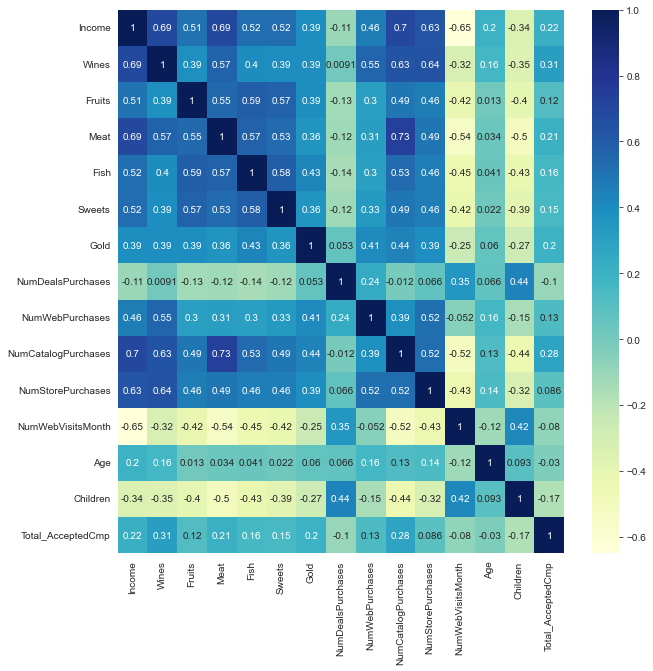

In [10]:
# Make a heatmap of the data 
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap="YlGnBu");

 - NumWebVisitsMonth vs Wines

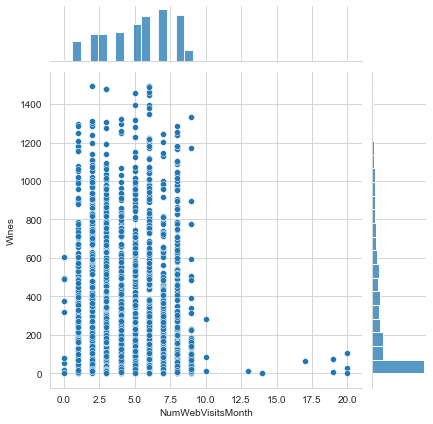

In [11]:
# more visits on web per month, less spend on wines ?
sns.jointplot(x='NumWebVisitsMonth', y='Wines', data=df)

 - Age vs Wines

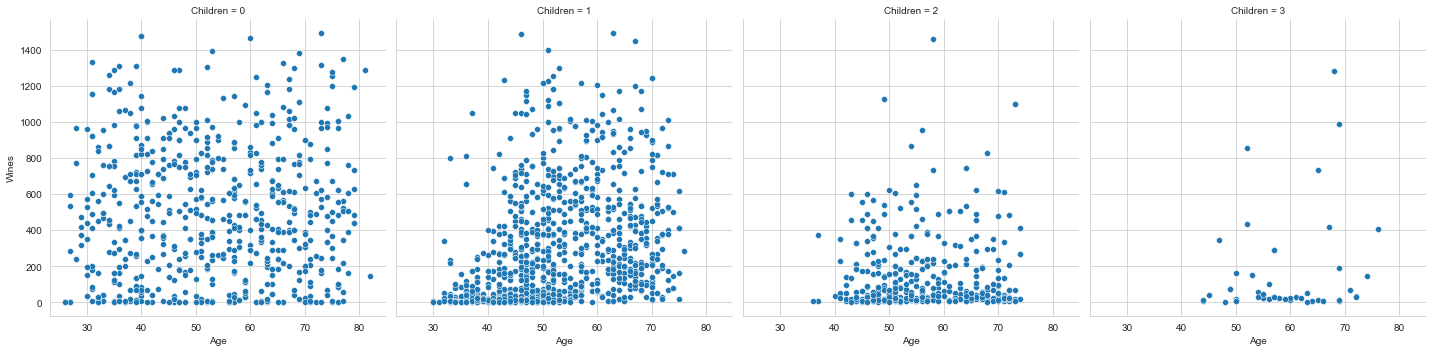

In [12]:
# middle-aged people (40-50) tend to spend less on wines
plt.figsize = (12,6)
sns.relplot(x='Age', y='Wines', data=df, kind='scatter', col='Children')

 - Income vs Wines

In [13]:
# clean outliers
df = df[(df.Income > 20000) & (df.Income < 120000)]

<AxesSubplot:xlabel='Income', ylabel='Wines'>

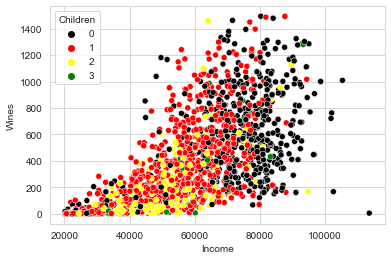

In [14]:
# higher income with less children tend to spend more money on wines?
hue_color = {0: 'black', 1:'red', 2:'yellow', 3:'green'}
sns.scatterplot(x='Income', y='Wines', data=df, hue='Children', palette=hue_color)

** We can see a positive correlation, and quite a steep one. There are some outliers, but as a whole, there is a steep looking line that looks like it ought to be drawn.
It also appears that having low incomes may limit the spend on wines. 

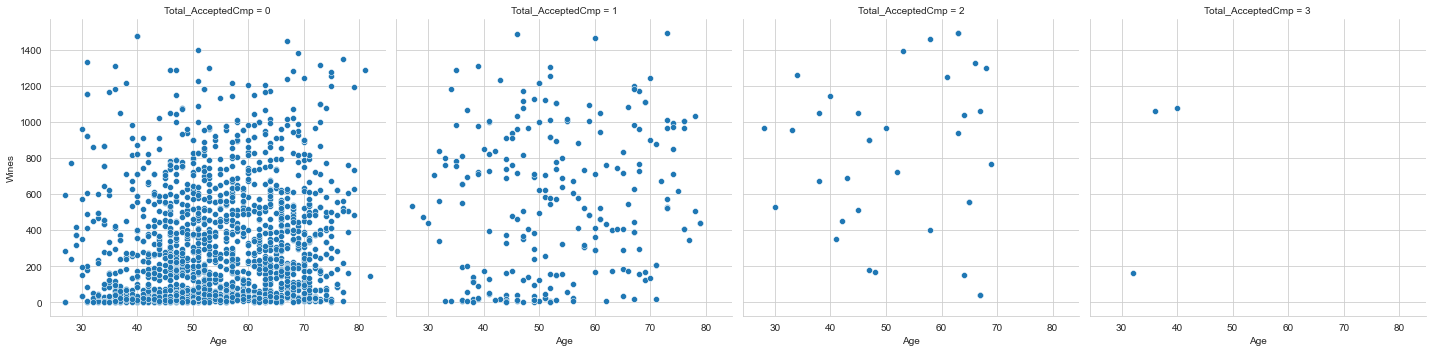

In [15]:
sns.relplot(x='Age', y='Wines', data=df, kind='scatter', col='Total_AcceptedCmp')

** It seems that more champaign don't influence people to spend on wines, relative to the number of children and income. What we may be seeing here is an exclusive vs. mass effect.

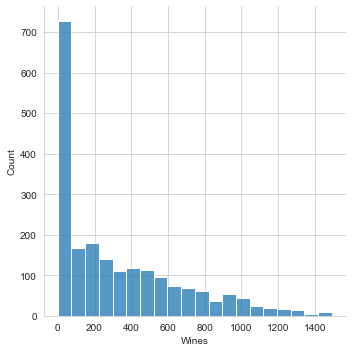

In [16]:
# histogram
_= sns.displot(df['Wines'])

<AxesSubplot:xlabel='Income', ylabel='Wines'>

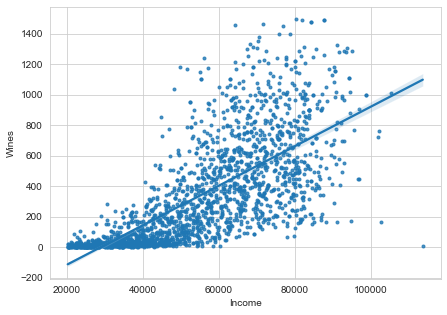

In [17]:
# Call the regplot method on sns object, with parameters: x = '', y = ''
plt.figure(figsize=(7,5))
sns.regplot(x='Income', y='Wines', data=df, marker='.')

The line of best fit matches the overall shape of the data, but __it's clear that there are some points that deviate from the line, rather than all clustering close__. 

In [18]:
df.columns

Index(['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Children',
       'Total_AcceptedCmp'],
      dtype='object')

In [19]:
# save the data to a new csv file
datapath = './'
save_file(df, 'customer_data_EDA.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./customer_data_EDA.csv"


###  Linear Regression Modeling 

#### a. Train/Test Split
First splitting the dataset into a a training set and a test set. 
Normally, we train with 75% of the data and test on the remaining 25%. 

The first model is focused on two variables: __Wines as dependent variable (response), and Income as sole independent predictor variable__. 

In [20]:
# statsmodels supports specifying models using R-style formulas and pandas DataFrames
import statsmodels.api as sm # load most of the public parts of statsmodels, make functions & classes available within 1 or 2 levels
from statsmodels.graphics.api import abline_plot # Plot a line given an intercept and slope.
from sklearn.metrics import mean_squared_error, r2_score # quantifying the quality of predictions.
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.

import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [21]:
# Subsetting our data into our dependent and independent variables.
X = df[['Income']]
y = df[['Wines']]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [22]:
# check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1558, 1) (1558, 1) (520, 1) (520, 1)


 - __Model_1: Linear Regression Model__

In [23]:
# Create the model
Model_1 = linear_model.LinearRegression() 

In [24]:
# train the model on our test data.
Model_1.fit(X_train, y_train)

LinearRegression()

In [25]:
print(Model_1.intercept_)

[-365.42522443]


In [36]:
coeff_df = pd.DataFrame(Model_1.coef_, X.columns, columns=['Coefficient'])
print('Coef{}'.format(coeff_df))

Coef        Coefficient
Income     0.012764


Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Income** is associated with an **increase of \0.012 **.

In [27]:
# Evaluate the model  
Model_1_score = Model_1.score(X_train, y_train)
print(Model_1_score)

0.5341011244820495


** R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully the model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation.
At the moment, the model_1 explains only about 53.4 % of the variation from the mean. There's more work to do!

In [28]:
# Use the model to make predictions about our test data
y_pred = Model_1.predict(X_test)

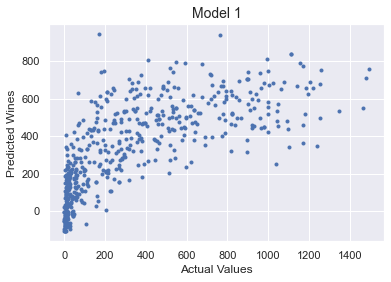

In [29]:
# plot the predictions against the actual result. Use scatter()
sns.set()
_= plt.scatter(y_test, y_pred, marker='.')
_= plt.xlabel('Actual Values')
_= plt.ylabel('Predicted Wines')
_= plt.title('Model 1', fontdict={'fontsize': 14})

In [30]:
# test residuals
residuals = y_test - y_pred

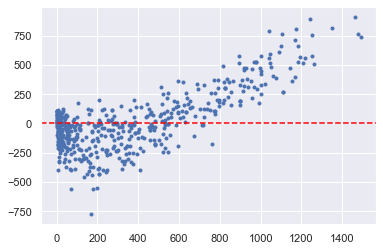

In [31]:
# residual plot
_= plt.scatter(y_test, residuals, marker='.')
_= plt.axhline(y=0, linestyle='--', color='red')

** The line at zero means that the perfect fit by the model. The residuals look not randomly distributed.(?) It appears some indication of issues of the underlying data (the model/data may not be a valid choice)

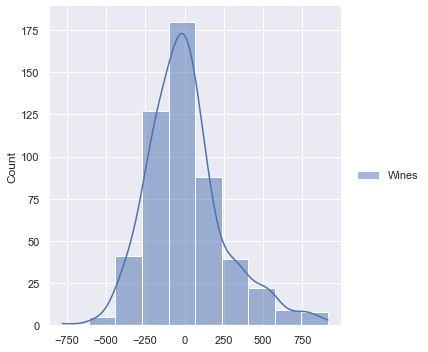

In [75]:
#residual distribution
_= sns.displot(residuals, bins=10, kde=True)

In [76]:
residuals

,Wines
108,-54.083987
1762,461.024952
346,21.403200
482,27.637070
1392,-180.221572
...,...
1589,-73.921768
1310,60.024154
208,-181.540094
834,-38.109437


The mean of residuals looks pretty close to zero. It is slightly skewed to the right but not too bad. 

In [80]:
import statsmodels.api as sm
import pylab
import scipy.stats as stats
 
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 520 and the array at index 1 has size 1

 - __Model_2: Linear Regression Model - OLS__
 <br>
The OLS method corresponds to minimizing the sum of square differences between the observed and predicted values.

In [ ]:
X = df[['Income']]
X = sm.add_constant(X)

y = df[['Wines']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
# Create the new model
Model_2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
results = Model_2.fit()

In [ ]:
# Evaluation
Model_2_summary = results.summary()
print(Model_2_summary)

** The R-squared score of Model_2 is 0.534, the same as what it was with model_1. This makes perfect sense.
It's the same value as the score from scikit-learn, because they've both used the same algorithm on the same data.

The p-value (under P>|t|) is so small, basically zero. This means that the income is a statistically significant predictor of the spend of wines.

The regression coefficient for Income of 0.0128 means that on average, each additional income is associated with an increase of  0.0128 in wines, net of the other variables. The confidence interval gives us a range of plausible values for this average change, about ( 0.012, 0.013 ), definitely not chump change.

The interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

In [ ]:
y_pred = results.predict(X_test)

In [ ]:
# Plot the predictions
# Build a scatterplot
_= plt.scatter(y_test, y_pred, marker='.', linestyle='None')

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
_= sns.regplot(data=df, x=y_test, y=y_pred, scatter=False, color='red',)

# Label it nicely
_= plt.xlabel('Income')
_= plt.ylabel('Wines')

 - __Model_3: Linear Regression Model - OLS multiple linear regression__

In [ ]:
X = df.drop(['Wines', 'NumWebPurchases'],axis=1)

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y = df[['Wines']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
# create the third model, it is the same algorithm, just different inputs
Model_3 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
results = Model_3.fit()

In [ ]:
# Evaluate the model
Model_3_summary = results.summary()
print(Model_3_summary)

 - Three common evaluation metrics for regression problems:
<br>**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
<br>**Mean Squared Error (MSE)** is the mean of the squared errors: $$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
<br>**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors

Comparing these metrics:
<br>MAE is the easiest to understand, because it's the average error.
<br>MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
<br>RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [ ]:
# print the intercept
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

** The R-Squared score shows some improvement - the first & second model predicted only around 53% of the variation,
but now we are predicting 68%!